#Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sc
import sklearn.metrics as metrics
from sklearn.metrics import *
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.decomposition import PCA



from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import time
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/AIP-BITS/BITS-DATA/main/cancer.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Exploratory Data Analysis

In [2]:
df.shape

(569, 31)

In [3]:
print('Targets', df['target'].unique())
df[df.columns[30]].value_counts()

Targets [0. 1.]


1.0    357
0.0    212
Name: target, dtype: int64

We see there is binary classification. Our goal would be train a machine to predict whether a person has cancer or not given a set of 30 feature variables.



In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**Checking the number of unique values**

In [5]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
mean radius,456
mean texture,479
mean perimeter,522
mean area,539
mean smoothness,474
mean compactness,537
mean concavity,537
mean concave points,542
mean symmetry,432
mean fractal dimension,499


From above we see that we have 1 categorical feature(target) and the rest are continuous features. We also have the categorical feature numerically encoded.
From the above table, it is clearly visible that the target feature is taking 0 and 1 as values.

**Null/Missing values**

In [6]:
print(df.isnull().values.any())
df.isnull().sum()

False


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

There are no null values.

# Basic Visualisation

**CORRELATION MATRIX AND HEATMAP**

In [7]:
dataset = pd.DataFrame (df, columns = list(df.columns))
dataset.corr ()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


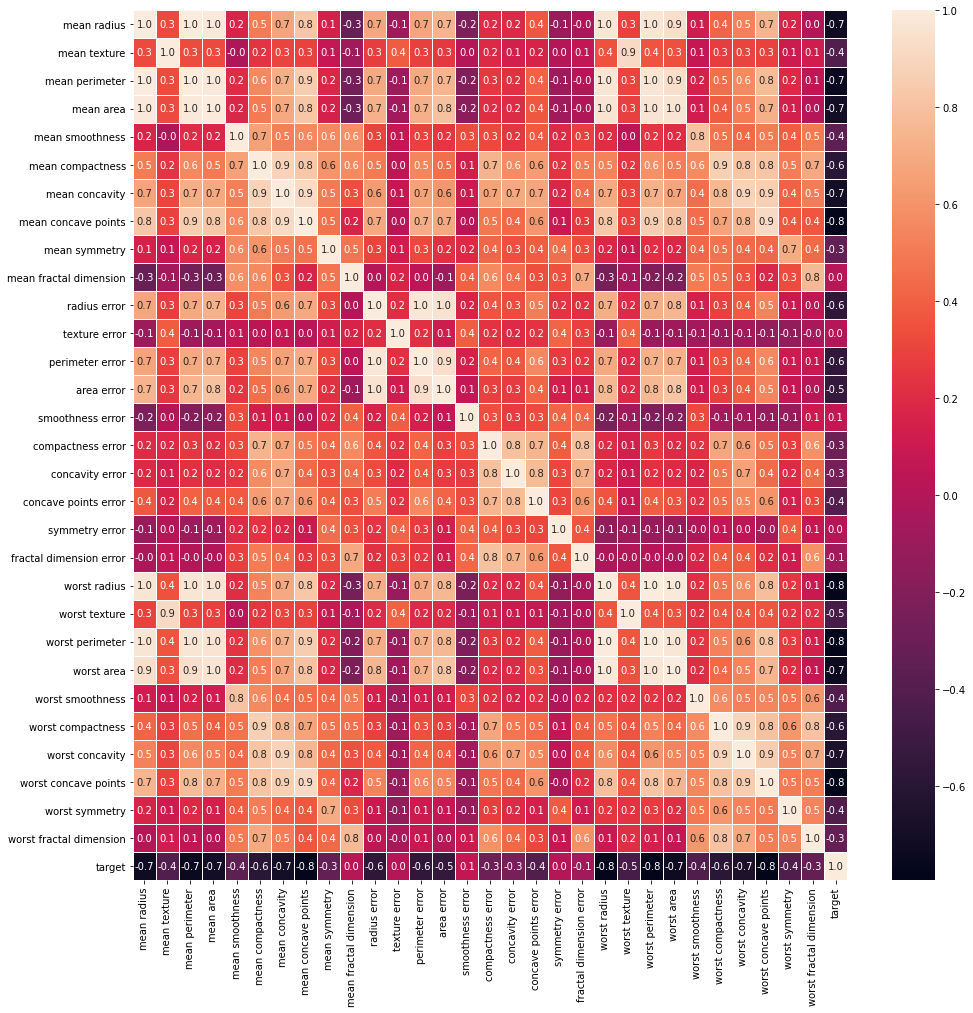

In [8]:
corr_Matrix = dataset.corr ()
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap (corr_Matrix, linewidths = 0.5, annot = True, fmt= '.1f',ax=ax)
plt.show ()

From the above heatmap - 



1. The "error" features are very weakly co-related (0 to 0.5) with the target variable. 
2.  The "mean" and "worst" features are strongly co-related to the target variable and to their corresponding selves.



**COUNTPLOT VISUAL**

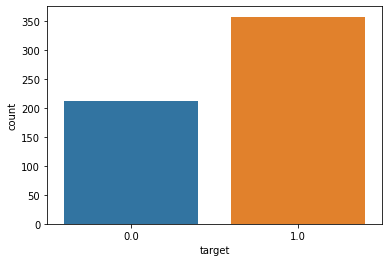

In [9]:
sns.countplot (x = 'target',data = df)
plt.show ()

Since there is no balance in the count of categories, we can say accuracy score in itself may not be a proper indicator. f1 score which is the harmonic mean of recall and precision can help in judging a model better.

# Data Preprocessing

**REMOVING OUTLIERS**

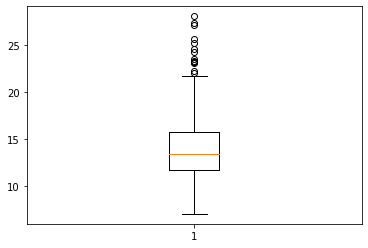

<Figure size 720x504 with 0 Axes>

In [10]:
plt.boxplot(df['mean radius'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [11]:
print("Old Shape: ", df.shape)
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print("New Shape: ", df.shape)

Old Shape:  (569, 31)
New Shape:  (495, 31)


**SPLITTING DATASET INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [12]:
# X = Features
# Y = Target

x = df.iloc[:, 0:30] #useful while training Categorical NB model
X = x.values
Y = df.iloc[:, 30:31].values

print("Shape of feature matrix is",X.shape)

Shape of feature matrix is (495, 30)


**SPLITTING THE MATRIX OF FEATURES AND RESPONSE FEATURE INTO TRAINING AND TEST SETS**

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, shuffle=True,random_state=42)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(396, 30) (396, 1) (99, 30) (99, 1)


In [14]:
name=[]
trainaccuracy_list=[]
testaccuracy_list=[]
F1score_list=[]
precision_list=[]
recall_list=[]
trainingtime_list=[]
predictiontime_list=[]

# Training a Default Classifier as baseline

**Training Logistic Regression Model as baseline**

In [15]:
classifier_log = LogisticRegression ()
t0 = time.time()
classifier_log.fit (X_train, Y_train)
t1 = time.time()
t2 = time.time()
Y_pred_log = classifier_log.predict (X_test)
t3 = time.time()
cross_classifier_log = cross_val_score(classifier_log, X, Y)
f1_classifier_log=f1_score(Y_test, Y_pred_log, average="macro")
precision_classifier_log=precision_score(Y_test, Y_pred_log, average="macro")
recall_classifier_log=recall_score(Y_test, Y_pred_log, average="macro")

name.append('baseline-logistic regression')
trainaccuracy_list.append(classifier_log.score(X_train,Y_train))
testaccuracy_list.append(classifier_log.score(X_test,Y_test))
F1score_list.append(f1_classifier_log)
precision_list.append(precision_classifier_log)
recall_list.append(recall_classifier_log)
trainingtime_list.append(t1-t0)
predictiontime_list.append(t3-t2)

**Decision Tree**

In [16]:
classifier_dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
t0 = time.time()
classifier_dtc.fit (X_train, Y_train)
t1 = time.time()
t2 = time.time()
Y_pred_dtc = classifier_dtc.predict (X_test)
t3 = time.time()
cross_classifier_dtc = cross_val_score(classifier_dtc, X, Y)
f1_classifier_dtc=f1_score(Y_test, Y_pred_dtc, average="macro")
precision_classifier_dtc=precision_score(Y_test, Y_pred_dtc, average="macro")
recall_classifier_dtc=recall_score(Y_test, Y_pred_dtc, average="macro")

name.append('Decision tree classifier')
trainaccuracy_list.append(classifier_dtc.score(X_train,Y_train))
testaccuracy_list.append(classifier_dtc.score(X_test,Y_test))
F1score_list.append(f1_classifier_dtc)
precision_list.append(precision_classifier_dtc)
recall_list.append(recall_classifier_dtc)
trainingtime_list.append(t1-t0)
predictiontime_list.append(t3-t2)

**Naive Bayes**

In [17]:
#gaussian naive bayes
classifier_gnb = GaussianNB ()
t0 = time.time()
classifier_gnb.fit (X_train, Y_train)
t1 = time.time()
t2 = time.time()
Y_pred_gnb = classifier_gnb.predict (X_test)
t3 = time.time()
cross_classifier_gnb = cross_val_score(classifier_gnb, X, Y)
f1_classifier_gnb=f1_score(Y_test, Y_pred_gnb, average="macro")
precision_classifier_gnb=precision_score(Y_test, Y_pred_gnb, average="macro")
recall_classifier_gnb=recall_score(Y_test, Y_pred_gnb, average="macro")

name.append('Gaussian naive bayes classifier')
trainaccuracy_list.append(classifier_gnb.score(X_train,Y_train))
testaccuracy_list.append(classifier_gnb.score(X_test,Y_test))
F1score_list.append(f1_classifier_gnb)
precision_list.append(precision_classifier_gnb)
recall_list.append(recall_classifier_gnb)
trainingtime_list.append(t1-t0)
predictiontime_list.append(t3-t2)

In [18]:
#bernoulli naive bayes
classifier_bnb = BernoulliNB ()
t0 = time.time()
classifier_bnb.fit (X_train, Y_train)
t1 = time.time()
t2 = time.time()
Y_pred_bnb = classifier_bnb.predict (X_test)
t3 = time.time()
cross_classifier_bnb = cross_val_score(classifier_bnb, X, Y)
f1_classifier_bnb=f1_score(Y_test, Y_pred_bnb, average="macro")
precision_classifier_bnb=precision_score(Y_test, Y_pred_bnb, average="macro")
recall_classifier_bnb=recall_score(Y_test, Y_pred_bnb, average="macro")

name.append('Bernoulli naive bayes classifier')
trainaccuracy_list.append(classifier_bnb.score(X_train,Y_train))
testaccuracy_list.append(classifier_bnb.score(X_test,Y_test))
F1score_list.append(f1_classifier_bnb)
precision_list.append(precision_classifier_bnb)
recall_list.append(recall_classifier_bnb)
trainingtime_list.append(t1-t0)
predictiontime_list.append(t3-t2)

In [19]:
#multinomial naive bayes
classifier_mnb = MultinomialNB ()
t0 = time.time()
classifier_mnb.fit (X_train, Y_train)
t1 = time.time()
t2 = time.time()
Y_pred_mnb = classifier_mnb.predict (X_test)
t3 = time.time()
cross_classifier_mnb = cross_val_score(classifier_mnb, X, Y)
f1_classifier_mnb=f1_score(Y_test, Y_pred_mnb, average="macro")
precision_classifier_mnb=precision_score(Y_test, Y_pred_mnb, average="macro")
recall_classifier_mnb=recall_score(Y_test, Y_pred_mnb, average="macro")

name.append('Multinomial naive bayes classifier')
trainaccuracy_list.append(classifier_mnb.score(X_train,Y_train))
testaccuracy_list.append(classifier_mnb.score(X_test,Y_test))
F1score_list.append(f1_classifier_mnb)
precision_list.append(precision_classifier_mnb)
recall_list.append(recall_classifier_mnb)
trainingtime_list.append(t1-t0)
predictiontime_list.append(t3-t2)

In [20]:
#complement naive bayes
classifier_comnb = ComplementNB ()
t0 = time.time()
classifier_comnb.fit (X_train, Y_train)
t1 = time.time()
t2 = time.time()
Y_pred_comnb = classifier_comnb.predict (X_test)
t3 = time.time()
cross_classifier_comnb = cross_val_score(classifier_comnb, X, Y)
f1_classifier_comnb=f1_score(Y_test, Y_pred_comnb, average="macro")
precision_classifier_comnb=precision_score(Y_test, Y_pred_comnb, average="macro")
recall_classifier_comnb=recall_score(Y_test, Y_pred_comnb, average="macro")

name.append('Complement naive bayes classifier')
trainaccuracy_list.append(classifier_comnb.score(X_train,Y_train))
testaccuracy_list.append(classifier_comnb.score(X_test,Y_test))
F1score_list.append(f1_classifier_comnb)
precision_list.append(precision_classifier_comnb)
recall_list.append(recall_classifier_comnb)
trainingtime_list.append(t1-t0)
predictiontime_list.append(t3-t2)

**SVM**

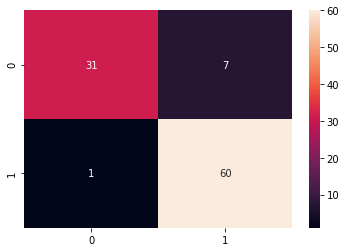

In [21]:
from sklearn.svm import SVC
classifier_svm = SVC (kernel = 'rbf', random_state = 0)
t0 = time.time()
classifier_svm.fit (X_train, Y_train)
t1 = time.time()
t2 = time.time()
Y_pred_svm = classifier_svm.predict (X_test)
t3 = time.time()
cross_classifier_svm = cross_val_score(classifier_svm, X, Y)
f1_classifier_svm=f1_score(Y_test, Y_pred_svm, average="macro")
precision_classifier_svm=precision_score(Y_test, Y_pred_svm, average="macro")
recall_classifier_svm=recall_score(Y_test, Y_pred_svm, average="macro")
cm = confusion_matrix(Y_test, Y_pred_svm)
sns.heatmap(cm, annot=True)

name.append('Support Vector classifier')
trainaccuracy_list.append(classifier_svm.score(X_train,Y_train))
testaccuracy_list.append(classifier_svm.score(X_test,Y_test))
F1score_list.append(f1_classifier_svm)
precision_list.append(precision_classifier_svm)
recall_list.append(recall_classifier_svm)
trainingtime_list.append(t1-t0)
predictiontime_list.append(t3-t2)

**Comparing Accuracies**

In [22]:
Scores = pd.DataFrame(
    {'Model': name,
     'Training accuracy':trainaccuracy_list,
     'Testing accuracy':testaccuracy_list,
     'F1 score':F1score_list,
     'Precision score':precision_list,
     'Recall score':recall_list,
     'Training time':trainingtime_list,
     'Prediction time':predictiontime_list,
    })
pd.set_option('expand_frame_repr', False)
print(Scores)

                                Model  Training accuracy  Testing accuracy  F1 score  Precision score  Recall score  Training time  Prediction time
0        baseline-logistic regression           0.952020          0.939394  0.935936         0.935936      0.935936       0.048035         0.000000
1            Decision tree classifier           1.000000          0.939394  0.935936         0.935936      0.935936       0.005130         0.001002
2     Gaussian naive bayes classifier           0.934343          0.979798  0.978645         0.978645      0.978645       0.001011         0.001017
3    Bernoulli naive bayes classifier           0.684343          0.616162  0.381250         0.308081      0.500000       0.002014         0.000000
4  Multinomial naive bayes classifier           0.909091          0.888889  0.880658         0.888170      0.875108       0.002097         0.000000
5   Complement naive bayes classifier           0.909091          0.878788  0.870532         0.875000      0.866

From the table above it is fairly evident that the GAUSSIAN NAIVE BAYES has the highest accuracy score of 0.979798 (97.98%) for our dataset.

From the Naive Bayes models, we see that Gaussian Naive bayes performed the best and hence we choose it for further optimization.

Also, Logistic Regression is chosen as the baseline model.

We try to optimize with hyperparameter tuning and PCA.

# Optimizing Decision Tree Classifier

**PRINCIPLE COMPONENT ANALYSIS (PCA)**

Before performing PCA, we need to standardize the feature variables.

**FEATURE SCALING**

In [23]:
#standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform (X_train)
X_test_std = scaler.transform (X_test)

PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one (here, equal dimensions).

In [24]:
def avg(lst):
  return sum(lst) / len(lst)

In [25]:
#pca
pca = PCA(n_components=None)

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

classifier_dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
t0 = time.time()
classifier_dtc.fit (X_train_pca, Y_train)
t1 = time.time()
t2 = time.time()
Y_pred_dtc_pca = classifier_dtc.predict (X_test_pca)
t3 = time.time()

cross_classifier_dtc = cross_val_score(classifier_dtc, X, Y)
f1_classifier_dtc=f1_score(Y_test,Y_pred_dtc_pca, average="macro")
precision_classifier_dtc=precision_score(Y_test, Y_pred_dtc_pca, average="macro")
recall_classifier_dtc=recall_score(Y_test, Y_pred_dtc_pca, average="macro")

print('Decision tree classifier after PCA ')
print("Training accuracy : ", classifier_dtc.score(X_train_pca,Y_train))
print("Testing accuracy : ", classifier_dtc.score(X_test_pca,Y_test))
print("F1 score :  ", f1_classifier_dtc)
print("Precision score : ", precision_classifier_dtc)
print("Recall score : ",recall_classifier_dtc)
print("Mean cross val score : ",avg(cross_classifier_dtc))
print("Training time : ", t1-t0)
print("Testing time : ",t3-t2)

Decision tree classifier after PCA 
Training accuracy :  1.0
Testing accuracy :  0.9393939393939394
F1 score :   0.9359361518550474
Precision score :  0.9359361518550474
Recall score :  0.9359361518550474
Mean cross val score :  0.9353535353535355
Training time :  0.00501251220703125
Testing time :  0.0


**HYPER-PARAMETER TUNING USING GRID SEARCH**

In [26]:
model=DecisionTreeClassifier()
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}
grid_search = GridSearchCV(model, param_grid=hyperparameter_space, scoring ="accuracy", n_jobs=-1, cv=5, return_train_score=True)
grid_search.fit(X, Y)

print("Optimal hyperparameter combination for decision tree classifier using grid search is:", grid_search.best_params_)
print("Score using best parameters is: ",grid_search.best_score_)

Optimal hyperparameter combination for decision tree classifier using grid search is: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6}
Score using best parameters is:  0.9555555555555555


In [27]:
df = pd.DataFrame(grid_search.cv_results_)
df.sort_values(by = "mean_test_score", ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
77,0.004209,0.000397,0.000399,0.000489,3,2,6,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.959596,0.919192,...,0.955556,0.022677,1,0.979798,0.982323,0.974747,0.962121,0.972222,0.974242,0.007035
74,0.003486,0.000457,0.000401,0.000491,3,2,3,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.949495,0.919192,...,0.953535,0.022677,2,0.979798,0.982323,0.974747,0.962121,0.972222,0.974242,0.007035
75,0.003990,0.000287,0.000400,0.000490,3,2,4,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.959596,0.919192,...,0.953535,0.022677,2,0.979798,0.982323,0.974747,0.962121,0.972222,0.974242,0.007035
76,0.003402,0.000491,0.000601,0.000491,3,2,5,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.949495,0.919192,...,0.953535,0.022677,2,0.979798,0.982323,0.974747,0.962121,0.972222,0.974242,0.007035
78,0.003386,0.000845,0.000200,0.000400,3,2,8,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.959596,0.919192,...,0.953535,0.022677,2,0.979798,0.982323,0.974747,0.962121,0.972222,0.974242,0.007035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.000800,0.000400,0.000000,0.000000,20,6,1,"{'max_depth': 20, 'min_samples_leaf': 6, 'min_...",NaN,NaN,...,NaN,NaN,556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,0.000799,0.000400,0.000000,0.000000,20,8,1,"{'max_depth': 20, 'min_samples_leaf': 8, 'min_...",NaN,NaN,...,NaN,NaN,516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,0.000600,0.000490,0.000000,0.000000,20,10,1,"{'max_depth': 20, 'min_samples_leaf': 10, 'min...",NaN,NaN,...,NaN,NaN,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,0.001002,0.000634,0.000000,0.000000,20,20,1,"{'max_depth': 20, 'min_samples_leaf': 20, 'min...",NaN,NaN,...,NaN,NaN,529,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
 maxscore = 0.00;

 for i in range(1,10):
     model=DecisionTreeClassifier()
     hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                             'min_samples_leaf':[1,2,4,6,8,10,20,30],
                             'min_samples_split':[1,2,3,4,5,6,8,10]}
     grid_search = GridSearchCV(model, param_grid=hyperparameter_space,scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
     grid_search.fit(X_train_pca, Y_train)
     scores = grid_search.cv_results_['mean_test_score']
     print("Optimal hyperparameter combination for decision tree classifier using grid search is:", grid_search.best_params_)
     df1 = pd.DataFrame({'score': scores})
     df1 = df1.to_numpy()
     df1 = df1[np.logical_not(np.isnan(df1))]
     if maxscore<df1.max():
         maxscore = df1.max()
         optimalparams = grid_search.best_params_
 print(maxscore)
 print(optimalparams)

Optimal hyperparameter combination for decision tree classifier using grid search is: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 8}
Optimal hyperparameter combination for decision tree classifier using grid search is: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10}
Optimal hyperparameter combination for decision tree classifier using grid search is: {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5}
Optimal hyperparameter combination for decision tree classifier using grid search is: {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}
Optimal hyperparameter combination for decision tree classifier using grid search is: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 6}
Optimal hyperparameter combination for decision tree classifier using grid search is: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 3}
Optimal hyperparameter combination for decision tree classifier using grid search is: {'max_depth':

**HYPER-PARAMETER TUNING USING RANDOM SEARCH**

In [29]:
model=DecisionTreeClassifier()
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}
random_search = RandomizedSearchCV(model, param_distributions=hyperparameter_space,scoring="accuracy",n_jobs=-1, cv=5, return_train_score=True)
random_search.fit(X, Y)

print("Optimal hyperparameter combination for decision tree classifier  using random search is:", random_search.best_params_)
print("Score using best parameters is: ",random_search.best_score_)

Optimal hyperparameter combination for decision tree classifier  using random search is: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 12}
Score using best parameters is:  0.9434343434343434


In [30]:
df = pd.DataFrame(random_search.cv_results_)
df.sort_values(by = "mean_test_score", ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.004657,0.000548,0.000200,0.000400,5,1,12,"{'min_samples_split': 5, 'min_samples_leaf': 1...",0.939394,0.909091,...,0.943434,0.019794,1,0.997475,0.994949,0.994949,0.994949,0.997475,0.995960,0.001237
8,0.003270,0.000134,0.000200,0.000400,5,6,3,"{'min_samples_split': 5, 'min_samples_leaf': 6...",0.929293,0.919192,...,0.941414,0.026648,2,0.972222,0.969697,0.969697,0.962121,0.972222,0.969192,0.003711
2,0.003441,0.000492,0.000202,0.000405,6,10,20,"{'min_samples_split': 6, 'min_samples_leaf': 1...",0.929293,0.919192,...,0.939394,0.014285,3,0.972222,0.969697,0.964646,0.952020,0.957071,0.963131,0.007593
3,0.003276,0.000415,0.000417,0.000511,2,20,15,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.929293,0.919192,...,0.937374,0.011780,4,0.941919,0.941919,0.936869,0.944444,0.939394,0.940909,0.002575
7,0.002605,0.000491,0.000735,0.000612,3,20,10,"{'min_samples_split': 3, 'min_samples_leaf': 2...",0.929293,0.919192,...,0.937374,0.011780,4,0.941919,0.941919,0.936869,0.944444,0.939394,0.940909,0.002575
9,0.003869,0.000572,0.000898,0.000477,6,1,15,"{'min_samples_split': 6, 'min_samples_leaf': 1...",0.929293,0.909091,...,0.931313,0.028138,6,0.994949,0.992424,0.992424,0.992424,0.994949,0.993434,0.001237
4,0.004673,0.000473,0.000400,0.000489,4,1,10,"{'min_samples_split': 4, 'min_samples_leaf': 1...",0.929293,0.878788,...,0.927273,0.029553,7,0.994949,0.997475,0.997475,1.000000,0.997475,0.997475,0.001597
1,0.002482,0.000524,0.000200,0.000400,3,30,3,"{'min_samples_split': 3, 'min_samples_leaf': 3...",0.898990,0.919192,...,0.911111,0.007559,8,0.934343,0.941919,0.931818,0.931818,0.936869,0.935354,0.003779
0,0.000404,0.000495,0.000000,0.000000,1,10,2,"{'min_samples_split': 1, 'min_samples_leaf': 1...",NaN,NaN,...,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.000600,0.000490,0.000000,0.000000,1,2,2,"{'min_samples_split': 1, 'min_samples_leaf': 2...",NaN,NaN,...,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Optimizing Naive Bayes Classifier 

Since above we see that Gaussian Naive bayes classifier has performed the best and we choose to optimize it further

**HYPER-PARAMETER TUNING USING GRID SEARCH**

In [31]:
model=GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)
grid_search = GridSearchCV(model, param_grid=params_NB,scoring="accuracy",n_jobs=-1, cv=cv_method, return_train_score=True)
grid_search.fit(X, Y)

print("Optimal hyperparameter combination for gaussian naive bayes classifier using grid search is:", grid_search.best_params_)
print("Score using best parameters is: ", grid_search.best_score_)

Optimal hyperparameter combination for gaussian naive bayes classifier using grid search is: {'var_smoothing': 3.5111917342151273e-09}
Score using best parameters is:  0.9468013468013468


In [32]:
df = pd.DataFrame(grid_search.cv_results_)
df.sort_values(by = "mean_test_score", ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score
93,0.001203,0.000371,0.000340,0.000481,0.0,{'var_smoothing': 3.5111917342151273e-09},0.939394,0.959596,0.949495,0.929293,...,0.949495,0.954545,0.962121,0.944444,0.946970,0.946970,0.962121,0.946970,0.950673,0.005599
99,0.001000,0.000416,0.000433,0.000534,0.0,{'var_smoothing': 1e-09},0.929293,0.959596,0.949495,0.939394,...,0.941919,0.949495,0.952020,0.939394,0.941919,0.939394,0.949495,0.941919,0.944276,0.004833
95,0.001117,0.000365,0.000578,0.000551,0.0,{'var_smoothing': 2.310129700083158e-09},0.939394,0.959596,0.939394,0.929293,...,0.944444,0.954545,0.957071,0.941919,0.944444,0.941919,0.957071,0.944444,0.947475,0.006199
92,0.001265,0.000576,0.000505,0.000542,0.0,{'var_smoothing': 4.328761281083061e-09},0.939394,0.959596,0.959596,0.929293,...,0.946970,0.954545,0.959596,0.941919,0.949495,0.946970,0.962121,0.949495,0.950168,0.005568
98,0.001034,0.000298,0.000367,0.000521,0.0,{'var_smoothing': 1.2328467394420635e-09},0.929293,0.959596,0.949495,0.929293,...,0.941919,0.946970,0.952020,0.936869,0.941919,0.941919,0.954545,0.941919,0.944108,0.005205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.000961,0.000408,0.000144,0.000367,0.432876,{'var_smoothing': 0.43287612810830584},0.878788,0.848485,0.878788,0.909091,...,0.881313,0.886364,0.873737,0.886364,0.876263,0.878788,0.883838,0.878788,0.878956,0.006419
3,0.001182,0.000317,0.000434,0.000535,0.53367,{'var_smoothing': 0.533669923120631},0.868687,0.848485,0.878788,0.909091,...,0.883838,0.881313,0.876263,0.888889,0.866162,0.868687,0.878788,0.873737,0.875758,0.006662
2,0.001263,0.000562,0.000291,0.000484,0.657933,{'var_smoothing': 0.657933224657568},0.868687,0.858586,0.878788,0.888889,...,0.876263,0.878788,0.873737,0.881313,0.863636,0.866162,0.876263,0.873737,0.873064,0.005644
1,0.001302,0.000614,0.000403,0.000579,0.811131,{'var_smoothing': 0.8111308307896871},0.868687,0.858586,0.868687,0.878788,...,0.873737,0.871212,0.868687,0.881313,0.858586,0.858586,0.868687,0.866162,0.867003,0.006231


**HYPER-PARAMETER TUNING USING RANDOM SEARCH**

In [33]:
model=GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)
random_search = RandomizedSearchCV(model, param_distributions=params_NB,scoring="accuracy",n_jobs=-1, cv=cv_method, return_train_score=True)
random_search.fit(X, Y)

print("Optimal hyperparameter combination for gaussian naive bayes classifier using random search is:", random_search.best_params_)
print("Score using best parameters is: ", random_search.best_score_)

Optimal hyperparameter combination for gaussian naive bayes classifier using random search is: {'var_smoothing': 2.848035868435799e-06}
Score using best parameters is:  0.9286195286195288


In [34]:
df = pd.DataFrame(random_search.cv_results_)
df.sort_values(by = "mean_test_score", ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score
9,0.001031,0.000372,0.000345,0.000490,0.000003,{'var_smoothing': 2.848035868435799e-06},0.929293,0.919192,0.919192,0.929293,...,0.924242,0.939394,0.936869,0.941919,0.929293,0.924242,0.926768,0.934343,0.930303,0.005594
5,0.000913,0.000369,0.000323,0.000542,0.0,{'var_smoothing': 2.848035868435799e-07},0.929293,0.919192,0.929293,0.919192,...,0.926768,0.934343,0.946970,0.946970,0.934343,0.926768,0.924242,0.934343,0.933165,0.006576
2,0.001278,0.000439,0.000341,0.000482,0.000008,{'var_smoothing': 8.111308307896873e-06},0.929293,0.919192,0.929293,0.929293,...,0.924242,0.939394,0.934343,0.939394,0.926768,0.924242,0.926768,0.934343,0.929630,0.005445
1,0.001101,0.000444,0.000213,0.000428,0.000123,{'var_smoothing': 0.0001232846739442066},0.929293,0.909091,0.909091,0.929293,...,0.921717,0.931818,0.931818,0.934343,0.924242,0.921717,0.919192,0.931818,0.926094,0.005090
4,0.000932,0.000543,0.000170,0.000433,0.000081,{'var_smoothing': 8.111308307896872e-05},0.929293,0.909091,0.919192,0.929293,...,0.924242,0.931818,0.934343,0.934343,0.924242,0.921717,0.921717,0.934343,0.927273,0.004809
3,0.001197,0.000524,0.000655,0.000542,0.01,{'var_smoothing': 0.01},0.919192,0.868687,0.919192,0.939394,...,0.911616,0.924242,0.914141,0.921717,0.909091,0.911616,0.909091,0.914141,0.912963,0.006037
0,0.001190,0.000501,0.000516,0.000563,0.015199,{'var_smoothing': 0.01519911082952933},0.919192,0.868687,0.919192,0.939394,...,0.909091,0.924242,0.914141,0.921717,0.909091,0.911616,0.909091,0.914141,0.912795,0.006107
6,0.000856,0.000442,0.000571,0.000545,0.065793,{'var_smoothing': 0.0657933224657568},0.909091,0.858586,0.929293,0.939394,...,0.904040,0.914141,0.906566,0.911616,0.898990,0.904040,0.901515,0.904040,0.904545,0.005846
7,0.001069,0.000097,0.000349,0.000495,0.231013,{'var_smoothing': 0.23101297000831597},0.878788,0.868687,0.888889,0.929293,...,0.896465,0.896465,0.893939,0.901515,0.886364,0.886364,0.888889,0.888889,0.890741,0.005644
8,0.001179,0.000495,0.000201,0.000402,0.432876,{'var_smoothing': 0.43287612810830584},0.878788,0.848485,0.878788,0.909091,...,0.881313,0.886364,0.873737,0.886364,0.876263,0.878788,0.883838,0.878788,0.878956,0.006419


# Optimizing the SVM Classifier

Training the SVM by changing the various tunable parameters and selecting the best one using accuracy, precision, recall, training time and testing time


Optimal hyperparameter combination for SVM classifier using grid search is: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Score using best parameters is:  0.9503059071729958

*******Training Data Classification report*******
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86        38
         1.0       0.90      0.93      0.92        61

    accuracy                           0.90        99
   macro avg       0.90      0.89      0.89        99
weighted avg       0.90      0.90      0.90        99



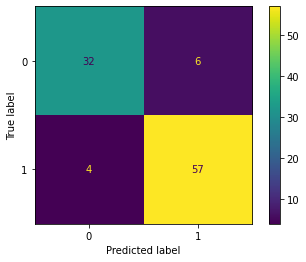


*******Testing Data Classification report*******
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       125
         1.0       0.97      0.98      0.97       271

    accuracy                           0.96       396
   macro avg       0.96      0.95      0.96       396
weighted avg       0.96      0.96      0.96       396



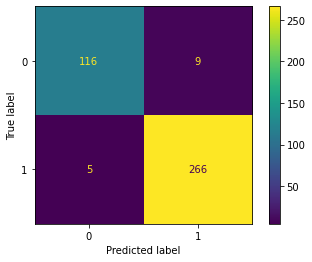

In [35]:
model=SVC ()
params_svc = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)
grid_search = GridSearchCV(model, param_grid=params_svc,scoring="accuracy",n_jobs=-1, cv=cv_method, return_train_score=True)
grid_search.fit(X_train, Y_train)

print("Optimal hyperparameter combination for SVM classifier using grid search is:", grid_search.best_params_)
print("Score using best parameters is: ", grid_search.best_score_)

Y_pred1 = grid_search.predict (X_test)
print()
print("*******Training Data Classification report*******")
print(classification_report(Y_test,Y_pred1))
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()
print()
Y_pred2 = grid_search.predict (X_train)
print("*******Testing Data Classification report*******")
print(classification_report(Y_train,Y_pred2))
confusion_matrix = metrics.confusion_matrix(Y_train,Y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [36]:
df = pd.DataFrame(grid_search.cv_results_)
df.sort_values(by = "mean_test_score", ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score
9,0.005435,0.001516,0.001934,0.000250,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.9750,0.974684,...,0.962145,0.962145,0.965300,0.955696,0.968454,0.971609,0.958991,0.962145,0.963171,0.004122
14,0.005936,0.002516,0.001934,0.000442,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.9625,0.974684,...,0.974763,0.974763,0.981073,0.965190,0.984227,0.984227,0.974763,0.974763,0.977273,0.005790
24,0.011003,0.006001,0.001600,0.000490,1000,0.0001,rbf,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",0.9125,0.974684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
19,0.005335,0.000869,0.001634,0.000465,100,0.0001,rbf,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",0.9375,0.974684,...,0.996845,0.993691,0.996845,1.000000,0.996845,1.000000,1.000000,0.996845,0.997897,0.002206
4,0.006365,0.000837,0.004668,0.004175,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.9625,0.962025,...,0.933754,0.933754,0.943218,0.933544,0.949527,0.952681,0.930599,0.936909,0.938974,0.007343
8,0.011254,0.001106,0.003934,0.000250,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.9500,0.974684,...,0.977918,0.977918,0.984227,0.984177,0.990536,0.984227,0.977918,0.981073,0.982956,0.004116
23,0.012237,0.003082,0.003835,0.000349,1000,0.001,rbf,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}",0.9125,0.974684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
18,0.011569,0.001328,0.003768,0.000403,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.9125,0.974684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
13,0.012874,0.005318,0.003634,0.000464,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.9125,0.974684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
15,0.018387,0.001324,0.006885,0.000301,100,1,rbf,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.6875,0.683544,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


Optimal hyperparameter combination for SVM classifier using random search is: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1}
Score using best parameters is:  0.9503059071729958

*******Training Data Classification report*******
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86        38
         1.0       0.90      0.93      0.92        61

    accuracy                           0.90        99
   macro avg       0.90      0.89      0.89        99
weighted avg       0.90      0.90      0.90        99



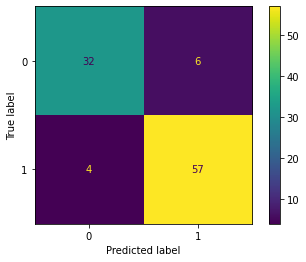


*******Testing Data Classification report*******
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       125
         1.0       0.97      0.98      0.97       271

    accuracy                           0.96       396
   macro avg       0.96      0.95      0.96       396
weighted avg       0.96      0.96      0.96       396



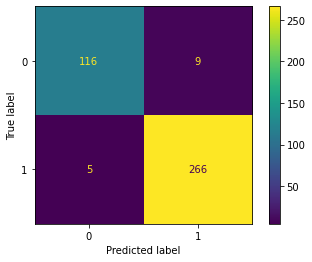

In [37]:
model=SVC ()
params_svc = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)
random_search = RandomizedSearchCV(model, param_distributions=params_svc,scoring="accuracy",n_jobs=-1, cv=cv_method, return_train_score=True)
random_search.fit(X_train, Y_train)

print("Optimal hyperparameter combination for SVM classifier using random search is:", random_search.best_params_)
print("Score using best parameters is: ", random_search.best_score_)

Y_pred1 = random_search.predict (X_test)
print()
print("*******Training Data Classification report*******")
print(classification_report(Y_test,Y_pred1))
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()
print()
Y_pred2 = random_search.predict (X_train)
print("*******Testing Data Classification report*******")
print(classification_report(Y_train,Y_pred2))
confusion_matrix = metrics.confusion_matrix(Y_train,Y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [38]:
df = pd.DataFrame(random_search.cv_results_)
df.sort_values(by = "mean_test_score", ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,...,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score
4,0.007404,0.003701,0.002267,0.000855,rbf,0.0001,1,"{'kernel': 'rbf', 'gamma': 0.0001, 'C': 1}",0.9750,0.974684,...,0.962145,0.962145,0.965300,0.955696,0.968454,0.971609,0.958991,0.962145,0.963171,0.004122
5,0.007134,0.002553,0.001734,0.000574,rbf,0.0001,1000,"{'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}",0.9125,0.974684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
0,0.008925,0.001195,0.003066,0.000250,rbf,0.001,100,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}",0.9125,0.974684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.013870,0.004633,0.003667,0.000870,rbf,0.001,1000,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}",0.9125,0.974684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.017004,0.004018,0.008203,0.005167,rbf,0.1,1,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}",0.6875,0.683544,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.017274,0.008267,0.005975,0.000915,rbf,0.01,0.1,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}",0.6875,0.683544,...,0.684543,0.684543,0.684543,0.683544,0.684543,0.684543,0.684543,0.684543,0.684343,0.000399
3,0.016701,0.004744,0.006270,0.000443,rbf,0.01,1,"{'kernel': 'rbf', 'gamma': 0.01, 'C': 1}",0.6875,0.683544,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.011870,0.001500,0.004401,0.000611,rbf,0.001,0.1,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 0.1}",0.6875,0.683544,...,0.684543,0.684543,0.684543,0.683544,0.684543,0.684543,0.684543,0.684543,0.684343,0.000399
8,0.023476,0.007668,0.007335,0.001011,rbf,1,10,"{'kernel': 'rbf', 'gamma': 1, 'C': 10}",0.6875,0.683544,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.019137,0.001928,0.006601,0.000490,rbf,0.1,1000,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}",0.6875,0.683544,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


The training accuracy with decision tree classifier after PCA is 1 but the testing accuracy is 0.94.This could be a case of overfitting.
After hyperparameter tuning using grid search and random search on the various models , we observe that using grid search on decision tree classifier gave the best score.

Optimal hyperparameter combination for decision tree classifier using grid search is:
{'max_depth': 3,'min_samples_leaf': 2,'min_samples_split': 6} with a score of 0.9555555555555555